# Soft margin algorithm with SGD

This algorithm is based on **Understanding Machine Learning** book by Shai Ben-David and Shai Shalev-Shwartz

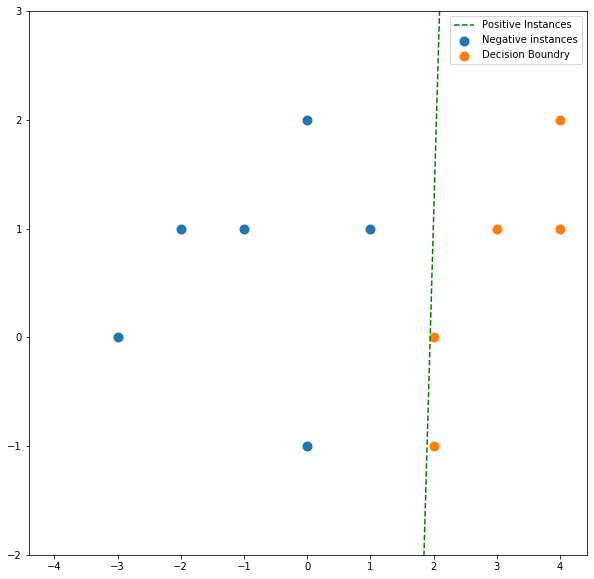

In [118]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Markdown as md


TrainData = np.array([[1,1],[0,2],[0,-1],[-1,1],[-2,1],[-3,0],[3,0],[2,0],[2,-1],[3,1],[4,1],[4,2]])# Trainig Data
labels = np.array([[1,1,1,1,1,1,-1,-1,-1,-1,-1,-1]])# Labels
TestData = np.array([[1,2],[-1,-1],[3,2],[4,0]])# Testing Data
labelsTest = np.array([[1,1,-1,-1]])# Testing Labels
W = [];B = []
w = np.zeros((1,2))# Weight Matrix
b = 0# Bias Scalar
#landa = np.sqrt(2/(1600*len(TrainData)))
landa = 0.01# The lambda factor in reference algorithm
epoches = 10000 # The number of iteration

for t in range(1,epoches+1):
    samp = np.random.randint(len(TrainData))
    if labels[0,samp]*(w@TrainData[samp,:].T+b) < 1:
        w = (1-1/t)*w+(1/(landa*t))*labels[0,samp]*TrainData[samp,:].T
        b = b +(1/(landa*t))*labels[0,samp]
    else:
        w = (1-1/t)*w
    B.append(b)
    W.append(w)

w_hat = np.array(W).sum(axis = 0)/(epoches)
b_hat = np.array(B).sum(axis = 0)/(epoches)

h = np.sign((w_hat)@TestData.T + b_hat)

error = np.sum((h != labelsTest).astype('int'))/4

x = np.linspace(-4,4,100)
y = -(w_hat[0,0]/w_hat[0,1])*x - b_hat/w_hat[0,1]
plt.figure(figsize=(10,10))
plt.ylim(top=3,bottom=-2)
plt.scatter(TrainData[0:6,0],TrainData[0:6,1],Linewidth=4)
plt.scatter(TrainData[7:12,0],TrainData[7:12,1],Linewidth=4)
#plt.grid()
plt.plot(x,y,'--',color = 'green')
plt.legend(['Positive Instances','Negative instances','Decision Boundry'])
plt.show()

In [119]:
md("$w_0 = %f$"%(w_hat[0,0]))


$w_0 = -14.864268$

In [120]:
md("$w_1 = %f$ "%(w_hat[0,1]))

$w_1 = 0.732642$ 

In [121]:
md("$Bias = %f$ "%(b))

$Bias = 22.951067$ 

In [122]:
md("$error \,  rate = %f\%% $ "%(error*100))

$error \,  rate = 0.000000\% $ 